## ЛАБОРАТОРНАЯ РАБОТА 3
#### ЧИСЛЕННОЕ РЕШЕНИЕ  КРАЕВЫХ ЗАДАЧ ДЛЯ ДИФФЕРЕНЦИАЛЬНЫХ УРАВНЕНИЙ

In [847]:
import numpy as np
import copy
import math
import matplotlib.pyplot as plt

#### Задача  3.1.

In [848]:
# метод конечных разностей
# общий вид au" + bu' + cu = f  
# h - шаг разбиения 
# u0(x0) = fU_0 и un(xn) = fU_n - граничные условия  

#вариант 20
a = - 1
b = 2
c = 8 

x0 = 0
xn = 2

h = 0.5

def f(x):
    return -2*x**2 + 8*x +3 

def fU_0(x):
    return 6

def fU_n(x):
    return -3 

In [849]:
def approximate_solution(a,b,c,f,h,x0,fU_0,xn,fU_n):  # метод прогонки для решения СЛАУ
    n = math.ceil((xn-x0)/h)
    x = np.arange(x0,xn+h, h)
    A = [(2*a - b*h) for i in range(1,n+1)]         # A[n-1]
    B = [(c*2*h**2 - 4*a) for i in range(n+1)]      # B[n]
    C = [(2*a + b*h) for i in range(0,n)]           # C[n-1]
    F = [(2*h**2*f(x[i])) for i in range(n+1)] 
    
    F[0] = fU_0(x0)
    F[n] = fU_n(xn)
    u = np.zeros(n+1) # массив решений
   
    B[n] = 1
    u[n] = fU_n(xn)
    B[0] = 1
    u[0] = fU_0(x0)

    a = np.zeros(n+1)
    s = np.zeros(n+1)
    s[0] = F[0]/B[0]
    
    for i in range(1,n):
        a[i] = - C[i]/(A[i]*a[i-1]+B[i])
        s[i] = (F[i]-A[i]*s[i-1])/(A[i]*a[i-1]+B[i])
    for i in reversed(range(1,n)):
        u[i] = a[i]*u[i+1]+s[i]
    return u
solv = approximate_solution(a,b,c,f,h,x0,fU_0,xn,fU_n)

In [850]:
# правило Рунге
def runge (I, I0):
    q = []
    for i in range(1,len(I)):
        q.append(abs(I[i] - I0[2*i])/ 3)
    return q 

In [851]:
h = 0.2  # берем в качестве начального шага
eps = 0.001 # заданная точность
M = 1000

while (M > eps):
    n = math.ceil((xn-x0)/h)
    y_ans_2h = approximate_solution(a,b,c,f,h,x0,fU_0,xn,fU_n)
    h=h/2
    y_ans_h = approximate_solution(a,b,c,f,h,x0,fU_0,xn,fU_n)
    rung_list = runge(y_ans_2h,y_ans_h)
    M = max(rung_list)

print("Шаг при погрешности по Рунге",eps," = ",h)
print("Число точек",math.ceil((xn-x0)/h))

Шаг при погрешности по Рунге 0.001  =  0.025
Число точек 80


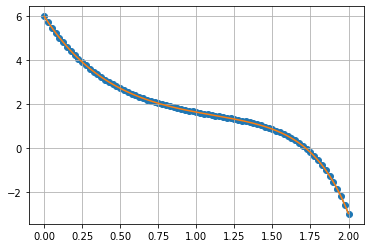

In [852]:
# Построить график решения.

# для графика решения методом 
solv = approximate_solution(a,b,c,f,h,x0,fU_0,xn,fU_n)
x = np.arange(x0,xn+h, h)

# график точного решения
def exact_solution(x):
    return  (math.e**(-2*x)*(math.e**(2*(x+6))*(-8*x**2 + 36*x + 1) + math.e**(2*x)*(8*x**2-36*x-1)-191*math.e**(6*x)-137*math.e**(6*x+4) + 191*math.e**12 + 137 *math.e**4))/(32*(math.e**12 - 1))
x_e = np.arange(0,2, 0.001)

x_graph = np.linspace(x0, xn, 1, endpoint = True) 
plt.plot(x, solv)
plt.plot(x_e, exact_solution(x_e))
plt.scatter(x, solv)
plt.grid('True')
plt.show()

#### Задача  3.2

In [853]:
#вычисляем функцию k(x) из индивидуального варианта

from itertools import permutations
def k(x):
    if  ((x >= 0) and (x <= 1)):
        return 14
    elif ((x > 1) and (x <= 2)):
        return (x+3)**(1/2)
    elif ((x > 2) and (x <= 3)):
        return   5 +2*x
    else:
        return "ОШИБКА"

In [854]:

x0 = 0
xn = 3

h = 0.001

def f(x):
    return -2*x**2 + 8*x +3 

def fU_0(x):
    return 1

def fU_n(x):
    return 5 

def q(x):
    return 8 

In [855]:
def approximate_solution(q,c,f,h,x0,fU_0,xn,fU_n):  # метод прогонки для решения СЛАУ
    n = math.ceil((xn-x0)/h)
    x = np.arange(x0,xn+h, h)
    B = []
    C = []
    A = []
    C.append(0)
    A.append(0)
    B.append(1) # B[0]
    for i in range(0,n-1):
        B.append(k((x[i-1]+x[i])/2) + k((x[i]+x[i+1])/2) + h**2*q(x))
        C.append(-k((x[i]+x[i+1])/2)) 
        A.append(-k((x[i-1]+x[i])/2))
    B.append(1) # B[n]
    F = [(h**2*f(x[i])) for i in range(n+1)] 
    C.append(0)
    A.append(0) # A[0]
    F[0] = fU_0(x0)
    F[n] = fU_n(xn)
    u = np.zeros(n+1) # массив решений

    u[n] = fU_n(xn) 
    u[0] = fU_0(x0)

    a = np.zeros(n+1)
    s = np.zeros(n+1)
    s[0] = F[0]/B[0]
    
    for i in range(1,n):
        a[i] = - C[i]/(A[i]*a[i-1]+B[i])
        s[i] = (F[i]-A[i]*s[i-1])/(A[i]*a[i-1]+B[i])

    for i in reversed(range(1,n)):
        u[i] = a[i]*u[i+1]+s[i]
    return u

h = 0.0001
solv = approximate_solution(q,c,f,h,x0,fU_0,xn,fU_n)

In [856]:
  # берем в качестве начального шага
j = math.ceil((2.3-x0)/h)
print(j)
print(len(solv))
print("значение в точке 2.3 = ",solv[j])

23000
30001
значение в точке 2.3 =  3.5898555197865245


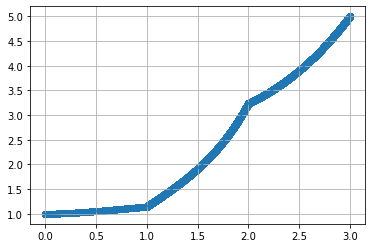

In [857]:
# Построить график решения.

# для графика решения методом 
solv = approximate_solution(q,c,f,h,x0,fU_0,xn,fU_n)
x = np.arange(x0,xn + h, h)

x_graph = np.linspace(x0, xn, 1, endpoint = True) 
plt.plot(x, solv,label="321")
plt.scatter(x, solv)
plt.grid('True')
plt.show()

для того, чтоб все графики были на одном рисунке 

In [858]:
from itertools import permutations

def k(x, k_list):
    if ((x >= 0) and (x <= 1)):
        return k_choice(k_list[0],x)
    elif ((x > 1) and (x <= 2)):
        return k_choice(k_list[1],x)
    elif ((x > 2) and (x <= 3)):
         return k_choice(k_list[2],x)
    else:
        print("ОШИБКА")
        return "ОШИБКА"
    
def k_choice(k_cell,x):
    if k_cell == 1:
        return (x+3)**(1/2) 
    if k_cell == 2:
        return 14 
    if k_cell == 3:
        return 5 + 2*x
    

In [859]:
def approximate_solution(q,c,f,h,x0,fU_0,xn,fU_n, k_l):  # метод прогонки для решения СЛАУ
    n = math.ceil((xn-x0)/h)
    x = np.arange(x0,xn+h, h)
    B = []
    C = []
    A = []
    C.append(0)
    A.append(0)
    B.append(1) # B[0]
    for i in range(0,n-1):
        B.append(k(((x[i-1]+x[i])/2),k_l) + k(((x[i]+x[i+1])/2), k_l) + h**2*q(x))
        C.append(-k(((x[i]+x[i+1])/2),k_l)) 
        A.append(-k(((x[i-1]+x[i])/2),k_l))
    B.append(1) # B[n]
    F = [(h**2*f(x[i])) for i in range(n+1)] 
    C.append(0)
    A.append(0) # A[0]
    F[0] = fU_0(x0)
    F[n] = fU_n(xn)
    u = np.zeros(n+1) # массив решений

    u[n] = fU_n(xn) 
    u[0] = fU_0(x0)

    a = np.zeros(n+1)
    s = np.zeros(n+1)
    s[0] = F[0]/B[0]
    
    for i in range(1,n):
        a[i] = - C[i]/(A[i]*a[i-1]+B[i])
        s[i] = (F[i]-A[i]*s[i-1])/(A[i]*a[i-1]+B[i])

    for i in reversed(range(1,n)):
        u[i] = a[i]*u[i+1]+s[i]
    return u

In [862]:
from itertools import permutations

solv = [] # массив решений 
k_list =[1,2,3]
k_list_one = list(permutations(k_list))

h = 0.0001
print("все варианты перестановок")
for i in range(len(k_list_one)):
    print(k_list_one[i])
    solv.append(approximate_solution(q,c,f,h,x0,fU_0,xn,fU_n,k_list_one[i]))
#print(solv)

все варианты перестановок
(1, 2, 3)
(1, 3, 2)
(2, 1, 3)
(2, 3, 1)
(3, 1, 2)
(3, 2, 1)


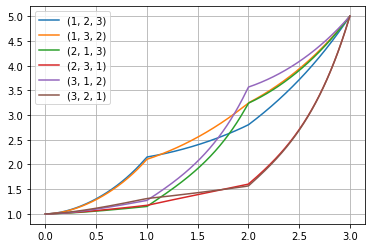

In [863]:
# Построить график решения.
# 1: (x+3)**(1/2) 
# 2: 14 
# 3: 5 + 2*x

x = np.arange(x0,xn+h, h)

x_graph = np.linspace(x0, xn, 1, endpoint = True) 
for i in range(len(solv)):
    plt.plot(x, solv[i],label=k_list_one[i]) 
    #plt.scatter(x, solv[i]) 
plt.grid('True')
plt.legend()
plt.show()